<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


In [4]:
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [114]:
df["ConvertedComp"].to_frame() #skow the column ConvertedComp in a dataframe


,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


Plot the distribution curve for the column `ConvertedComp`.


In [32]:
#count the missing valuses in the column ConvertedComp
df.ConvertedComp.isnull().sum()


816

In [36]:
#delete the missing values
new_ConvertedComp=df.ConvertedComp.dropna()
new_ConvertedComp.isnull().sum()

0

<ipython-input-99-5480814a25ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_ConvertedComp);


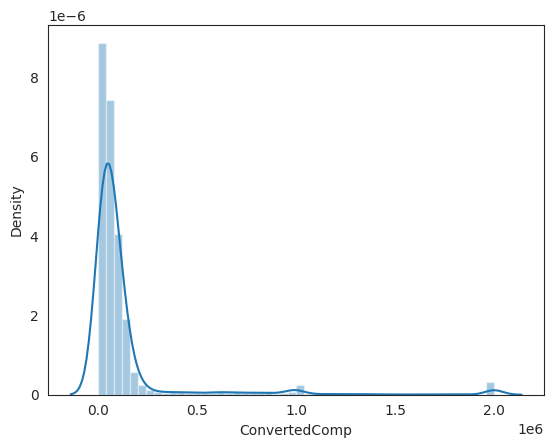

In [99]:
#Plot the distribution curve for the column ConvertedComp
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(new_ConvertedComp);

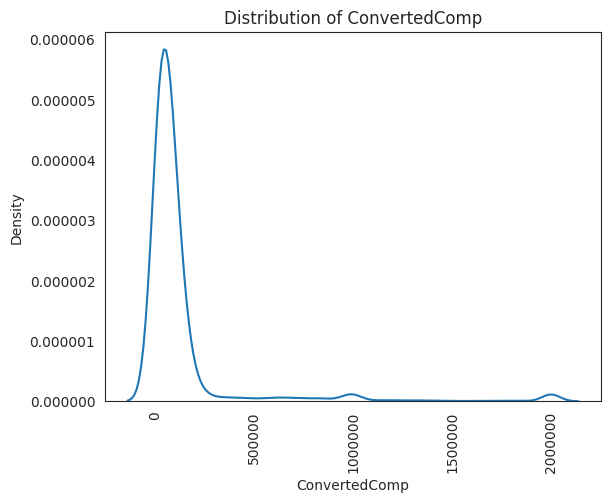

In [96]:

#we can also Plot the distribution curve for the column ConvertedComp with the function kdeplot() like this:

sns.kdeplot(new_ConvertedComp) #or use sns.displot()
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show();

Plot the histogram for the column `ConvertedComp`.


In [110]:
#count the number of every unique value in the column ConvertedComp
df.ConvertedComp.value_counts()

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: ConvertedComp, Length: 3515, dtype: int64

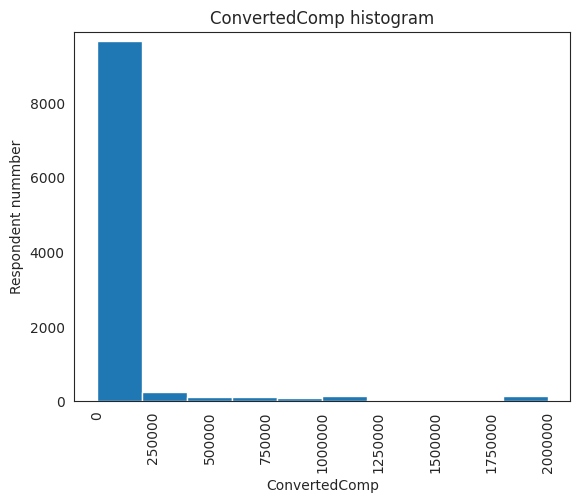

In [102]:
#Plot the histogram curve for the column ConvertedComp

plt.hist(new_ConvertedComp)
plt.title('ConvertedComp histogram')
plt.xlabel('ConvertedComp')
plt.ylabel('Respondent nummber')
plt.ylim(0, 9900)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90);



What is the median of the column `ConvertedComp`?


In [116]:
median = df["ConvertedComp"].median()
print("The median of the column ConvertedComp is:", median)

The median of the column ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [141]:
Gender_counts = df.Gender.value_counts()
count_Man_Gender = Gender_counts["Man"]
print("responders who identified themselves only as a Man:", count_Man_Gender)

responders who identified themselves only as a Man: 10480


In [139]:
Gender_counts

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [147]:
df_woman =df[df["Gender"]=="Woman"]
woman_ConvertedComp_median = df_woman.ConvertedComp.median()
print("The median ConvertedComp of responders identified themselves only as a Woman is:", woman_ConvertedComp_median )

The median ConvertedComp of responders identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [148]:
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

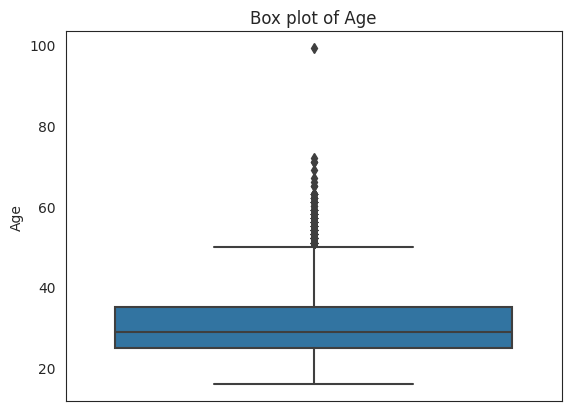

In [163]:
# Create a box plot for Age
sns.boxplot(y=df['Age'])
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Plot a histogram of the column `Age`.


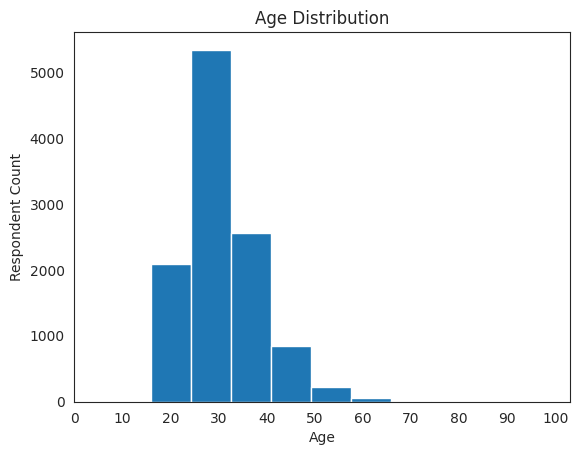

In [156]:
plt.hist(data=df, x="Age")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.xticks(range(0, 101, 10))
plt.ylabel("Respondent Count");

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


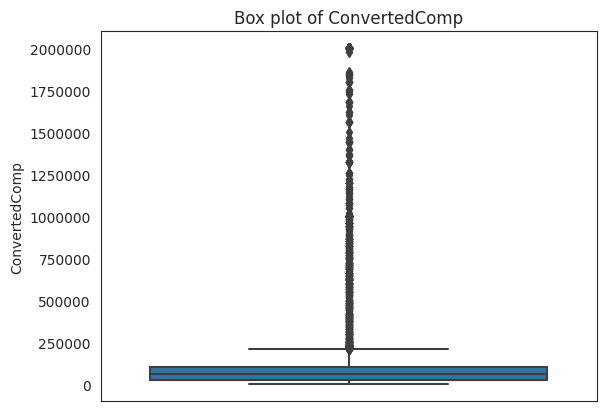

In [162]:
# Create a box plot for ConvertedComp
sns.boxplot(y=df['ConvertedComp'])
plt.title('Box plot of ConvertedComp')
plt.ylabel('ConvertedComp')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [165]:
df.ConvertedComp.isnull().sum()

816

In [232]:
converted_comp = df['ConvertedComp'].dropna()
q1 = converted_comp.quantile(0.25)
q3 = converted_comp.quantile(0.75)
iqr = q3 - q1

print("The interquartile range (IQR) for ConvertedComp is:", iqr)


The interquartile range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [233]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print("The upper bound for ConvertedComp is:", upper_bound)
print("The lower bound for ConvertedComp is:", lower_bound)


The upper bound for ConvertedComp is: 209698.0
The lower bound for ConvertedComp is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [234]:
outlier_upper = df['ConvertedComp'] > upper_bound
outlier_lower = df['ConvertedComp'] < lower_bound
outliers = df[outside_upper | outside_lower]
print("The number of outliers in ConvertedComp is:", len(outliers))

The number of outliers in ConvertedComp is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [235]:
no_outliers_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("The new dataframe with outliers removed has", len(no_outliers_df), "rows.")

The new dataframe with outliers removed has 9703 rows.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [216]:
df.corr()["Age"].sort_values().round(2)

<ipython-input-216-b1f74e17d9b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Age"].sort_values().round(2)


CodeRevHrs      -0.02
Respondent       0.00
CompTotal        0.01
WorkWeekHrs      0.04
ConvertedComp    0.11
Age              1.00
Name: Age, dtype: float64

In [215]:
df.corr().round(2)

<ipython-input-215-1b12ae3e9d93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.00,-0.01,0.00,-0.02,0.00,0.00
CompTotal,-0.01,1.00,0.00,0.00,0.01,0.01
ConvertedComp,0.00,0.00,1.00,0.02,-0.03,0.11
WorkWeekHrs,-0.02,0.00,0.02,1.00,0.03,0.04
CodeRevHrs,0.00,0.01,-0.03,0.03,1.00,-0.02
Age,0.00,0.01,0.11,0.04,-0.02,1.00


<ipython-input-222-07a8d392303c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True)


<Axes: >

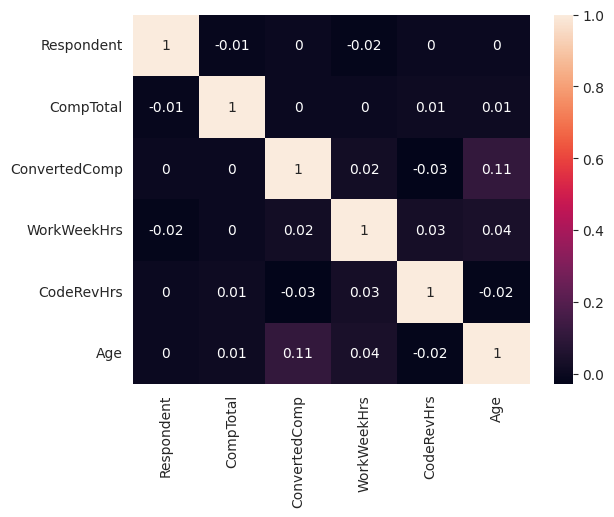

In [222]:
sns.heatmap(df.corr().round(2), annot=True)

In [223]:
df.Age.median()

29.0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
